### Problem Statement:
The marketing department for a credit card company wants to learn more about the different kinds of customers they have in order to develop a marketing strategy that targets each group separately. 
As a data scientist, your job is to find the best way to divide the customers into groups, and to develop a description of each group to be used by the marketing strategists.

#### Objective:
To segment customers into groups for a targeted marketing strategy.

In [99]:
# Import necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DATA 

In [100]:
# Queston_1a
# Load the CC_GENERAL dataset
data = pd.read_csv("CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [101]:
# Statistical summary of the CC GENERAL dataset
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### Column Descriptions

- **CUST_ID**: Unique customer ID. *  
- **BALANCE**: Balance left in the account.  
- **BALANCE_FREQUENCY**: How often the balance is updated *(closer to 1 = frequent).*  
- **PURCHASES**: Total amount spent on purchases.  
- **ONEOFF_PURCHASES**: Purchases made in a single go 
- **INSTALLMENTS_PURCHASES**: Purchases made in installments.  
- **CASH_ADVANCE**: Cash borrowed from credit card.  
- **PURCHASES_FREQUENCY**: How often the customer makes purchases.  
- **ONEOFF_PURCHASES_FREQUENCY**: Frequency of one-time big purchases.  
- **PURCHASES_INSTALLMENTS_FREQUENCY**: Frequency of installment purchases.  
- **CASH_ADVANCE_FREQUENCY**: How often cash advance is taken.  
- **CASH_ADVANCE_TRX**: Number of times cash advances are taken.  
- **PURCHASES_TRX**: Number of purchase transactions.  
- **CREDIT_LIMIT**: Credit card limit for the customer.  
- **PAYMENTS**: Total amount of payments made.  
- **MINIMUM_PAYMENTS**: Minimum amount paid by customer.  
- **PRC_FULL_PAYMENT**: Percentage of payments made in full.  
- **TENURE**: Number of months the customer has been with the company.  

#### Observations from Summary Statistics

- **Wide Ranges:**  
  Most variables ( BALANCE,PURCHASES,CASH_ADVANCE) show very large gaps between minimum and maximum values.  
  :This means customer spending and borrowing behaviors vary a lot.  

- **Clustering Relevance:**  
  These differences are valuable for clustering, as they highlight clear spending patterns that can help separate low, medium, and high-value customers.  


In [102]:
# Question_1b
# CHecking for data types and missing values
print("Data Info:")
data.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  


In [103]:
# Missing values per column:
print("Missing Values in the dataset:")
data.isnull().sum()

Missing Values in the dataset:


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [104]:
# Check for duplicates
print("Number of duplicate rows:",data.duplicated().sum())

Number of duplicate rows: 0


### Observations

- Most columns are numeric (float64 or int64), which is good for clustering.  
- **CUST_ID** is an object type  it’s just an identifier and not useful for clustering.  
- Missing values appear in:  
  - **CREDIT_LIMIT** 1 missing value.  
  - **MINIMUM_PAYMENTS** 313 missing values.  

#### Data Cleaninig: 

In [105]:
# Fill missing values with column median
data = data.fillna(data.median(numeric_only=True))

In [106]:
# Double-check no missing values remain
print("Missing values after cleaning:")
print(data.isnull().sum())


Missing values after cleaning:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


---
### The changes and cleaning process

**1. Checked for duplicates**  
- Used data.duplicated().sum() to find duplicate rows.  
- Found no duplicate in the dataset.  

**2. Checked for missing values**  
- Used data.isnull().sum() to count missing values in each column.  
- Observations:  
  - CREDIT_LIMIT:1 missing value.  
  - MINIMUM_PAYMENTS: 313 missing values.  

**3. Handled missing values**  
- Decided to fill missing values with the median of each column.    
- Applied: data.fillna(data.median()).  

**4. Confirmed cleaning**  
- Re-checked with data.isnull().sum() → no missing values remain. 

** After runnuing the code:
    No missing values.
    Only numeric columns remain(except CUST_ID with object data type, which I’ll drop before clustering).


In [107]:
# Question_1c

# Drop the identifier column
data = data.drop(columns=["CUST_ID"])

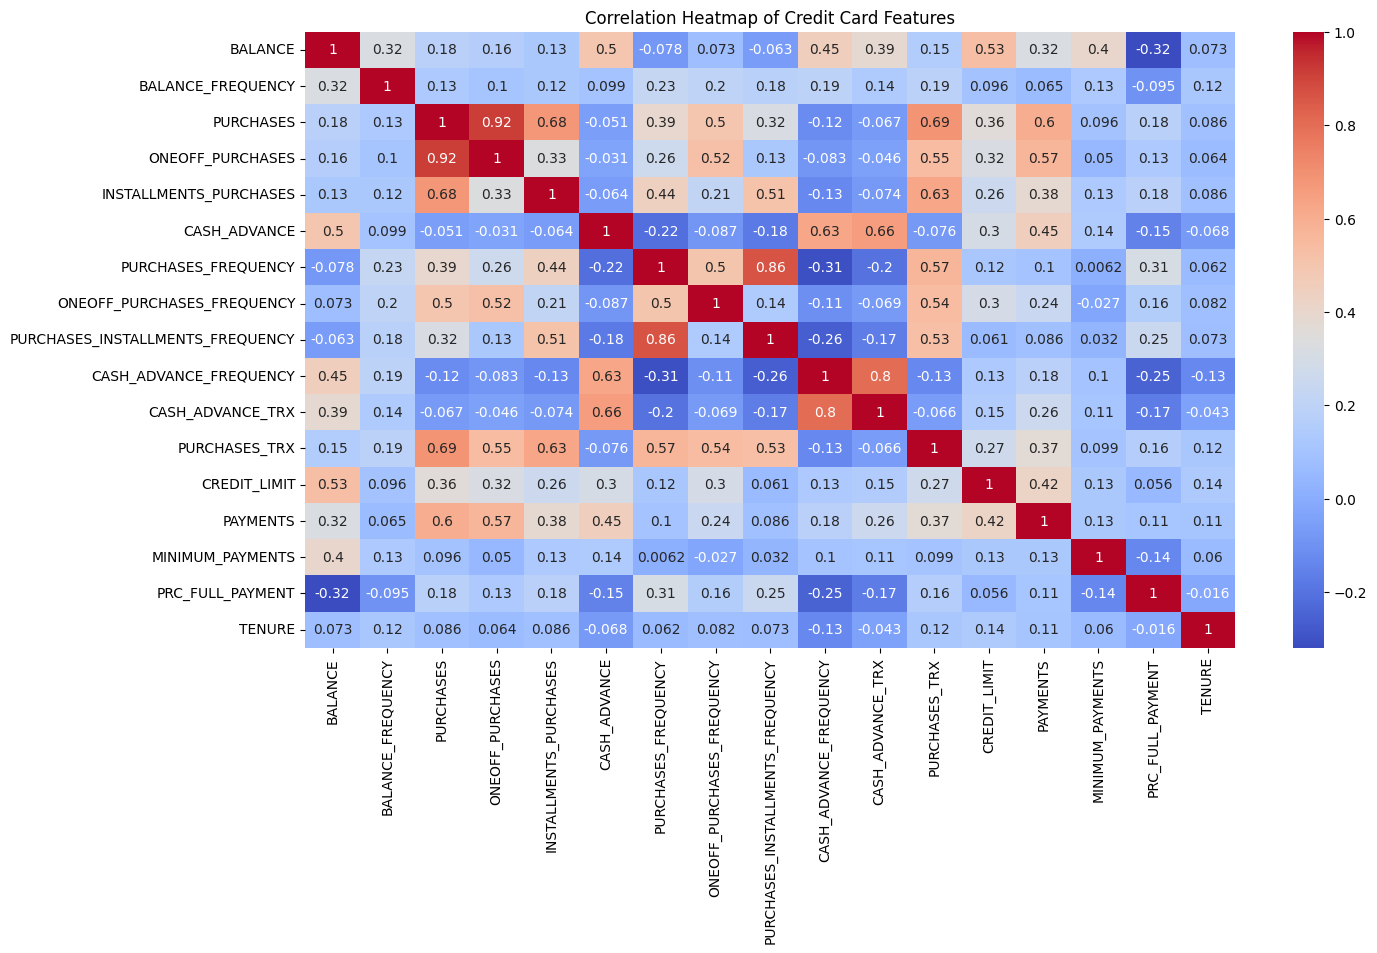

In [108]:
# plotting correclation matrix for the features
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap of Credit Card Features")
plt.show()

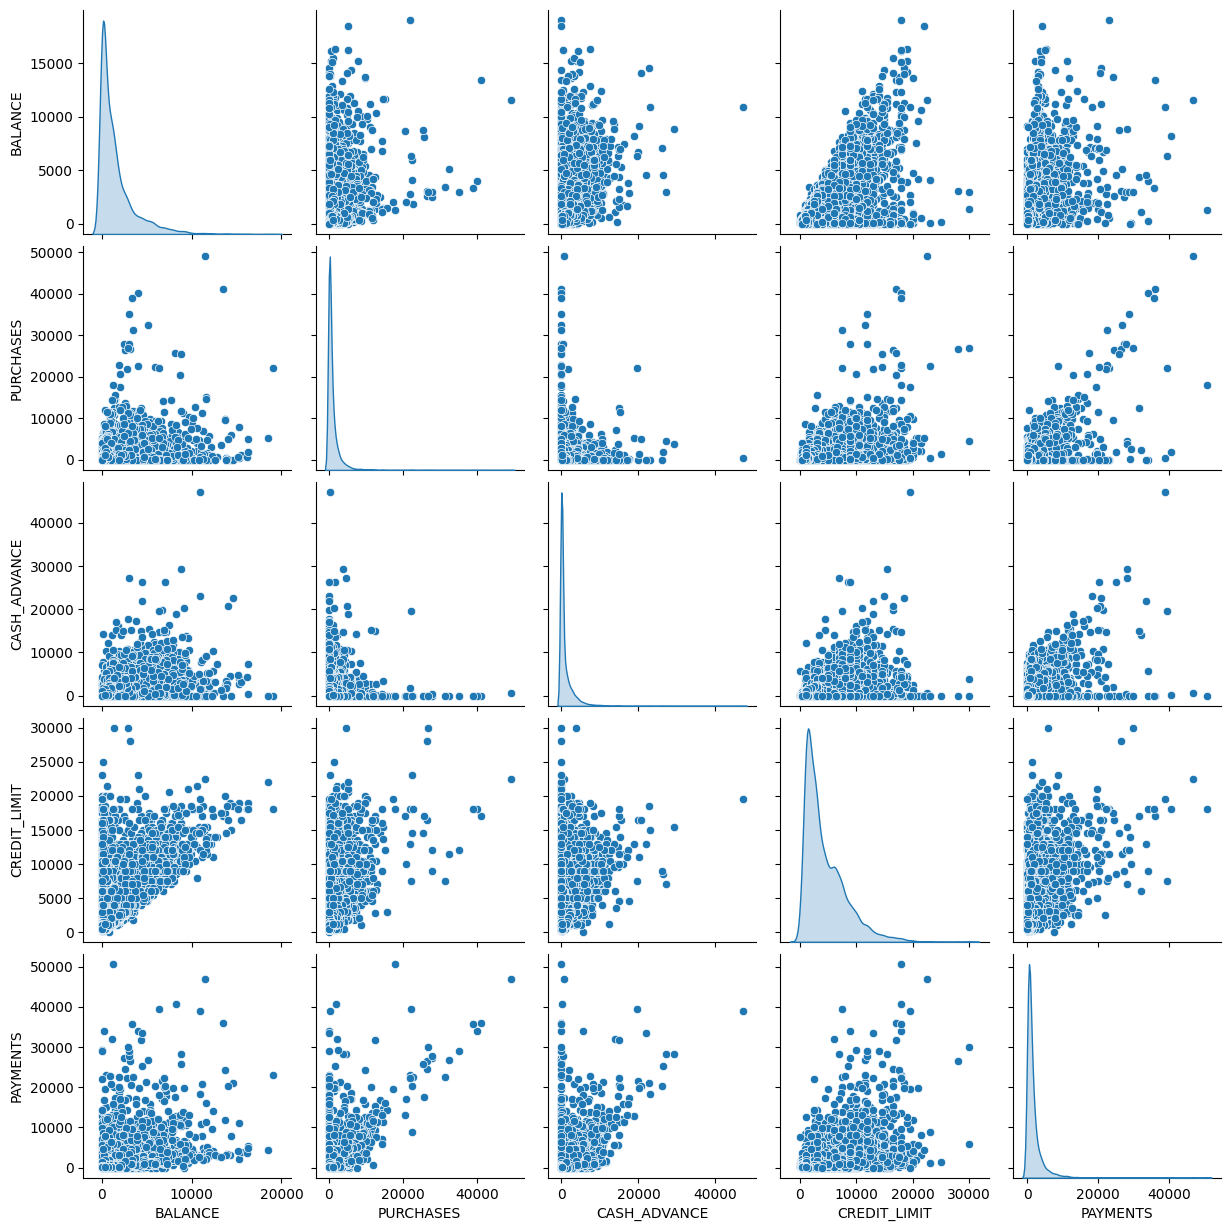

In [109]:
# plot the pairplot of key variables to see meaningful patterns. (the data is large and it was messy when i try to plot all the feastures) 
sns.pairplot(
    data[['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']], 
    diag_kind="kde"
)
plt.show()

#### Correlation Heatmap Insights:

**High correlation pairs:**

- **PURCHASES and PURCHASES_TRX:** More transactions = higher total purchases.  
- **CASH_ADVANCE and CASH_ADVANCE_TRX:** More advances taken = larger total amount.  
- **ONEOFF_PURCHASES and PURCHASES:** Customers who make one-off purchases tend to have higher total spending.  

**Low correlation pairs:**

- **BALANCE:** Has weak correlation with purchase behavior (someone can carry balance but not shop much).  
- **PRC_FULL_PAYMENT and CASH_ADVANCE:** Negatively correlated → people who pay in full rarely use cash advances.  

#### Scatter Plots & Histogram Insights:

**Observations:**
- A handful of features for the pairplot because using all of them would make the plot overcrowded and unreadable
- The diagonal histograms: show that most variables are right-skewed.  
  For example, BALANCE, PURCHASES, and CASH_ADVANCE have many customers with low values and a few with very high values (long tails).

**Scatter Plot Relationships:**

- BALANCE vs. CREDIT_LIMIT: Positive trend → customers with higher credit limits tend to carry higher balances.  
- PURCHASES vs. PAYMENTS: Strong positive relationship: people who spend more also make higher payments.  
- CASH_ADVANCE vs. BALANCE: Positive correlation :customers who take more cash advances often maintain higher balances.  
- PURCHASES vs. CREDIT_LIMIT: Some correlation : higher credit limits allow for more purchases, but not always strongly.  

**Useful Insights:**

- A few extreme outliers exist (customers with extremely high purchases, balances, or cash advances).  
- Most customers cluster near lower values (low balance, low purchases, low cash advances).  

### 2. Modelling

In [110]:
# Question 2a

from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

# Convert back to DataFrame for readability
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)

# Print the first 5 rows of transformed dataset
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


**Agglomerative Clustering (Using sklearn)**

In [111]:
# Question 2_b

# import libraies
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


# Declared clustering parameters
# -------------------------------
# Number of clusters to try
n_clusters_list = [2, 3, 4, 5, 6]                
# Linkage strategies
linkage_methods = ["ward", "complete", "average"] 
 # Distance metrics to try
distance_metrics = ["euclidean"]                 
# -------------------------------

# Store results here
results = []

for n_clusters in n_clusters_list:
    for linkage in linkage_methods:
        
        # Ward works only with Euclidean distance
        if linkage == "ward":
            metrics_to_use = ["euclidean"]
        else:
            metrics_to_use = distance_metrics
        
        for metric in metrics_to_use:
            # Build model
            model = AgglomerativeClustering(
                n_clusters=n_clusters, 
                linkage=linkage, 
                metric=metric
            )
            
            # Fit & predict clusters
            labels = model.fit_predict(scaled_df)
            
            # Evaluate clusters
            score = silhouette_score(scaled_df, labels)
            
            # Save results
            results.append([n_clusters, linkage, metric, score])

# Convert results into DataFrame
results_df_agglo = pd.DataFrame(
    results, 
    columns=["n_clusters", "linkage", "metric", "silhouette_score"]
)

print(results_df_agglo)

    n_clusters   linkage     metric  silhouette_score
0            2      ward  euclidean          0.355422
1            2  complete  euclidean          0.244370
2            2   average  euclidean          0.457341
3            3      ward  euclidean          0.333478
4            3  complete  euclidean          0.236995
5            3   average  euclidean          0.430055
6            4      ward  euclidean          0.254563
7            4  complete  euclidean          0.286449
8            4   average  euclidean          0.343079
9            5      ward  euclidean          0.228211
10           5  complete  euclidean          0.286125
11           5   average  euclidean          0.268295
12           6      ward  euclidean          0.232796
13           6  complete  euclidean          0.295988
14           6   average  euclidean          0.224265


In [112]:
# Find the row with the highest silhouette score
best_result_agglo = results_df_agglo.loc[results_df_agglo["silhouette_score"].idxmax()]

print(f"Best model(agglomerative) is with {best_result_agglo['n_clusters']} clusters, "
      f"linkage = {best_result_agglo['linkage']}, "
      f"metric = {best_result_agglo['metric']}, "
      f"silhouette score = {best_result_agglo['silhouette_score']:.3f}")

Best model(agglomerative) is with 2 clusters, linkage = average, metric = euclidean, silhouette score = 0.457


#### Best Clustering Result using Agglometrative Clustering

Silhouette score helps measure cluster quality (closer to 1 = better).
The best silhouette score was 0.457 with 2 clusters,
using average linkage and Euclidean distance.

#### Interpretation

- **Cluster 0** : Customers with lower balances and lower purchase activity.  
- **Cluster 1** : Customers with higher balances, purchases, and payments.  

#### Marketing Insights
These two groups are meaningful for targeted strategies:

- **Cluster 0**: (low activity customers): 
  May need promotions or incentives to spend more.  

- **Cluster 1 (high activity customers):**  
  Could be offered loyalty programs, premium cards, or higher credit limits.  


**Hierarchical Clustering**

In [113]:
# Question 2c
# Import SciPy Functions
from scipy.cluster.hierarchy import linkage, fcluster

# Declared clustering parameters
# -------------------------------
 # Try different linkage methods
linkage_methods = ["ward", "complete", "average"] 
# Number of clusters to try
n_clusters_list = [2, 3, 4, 5, 6]
# Clustering criterion
criterion = "maxclust"                              
# -------------------------------

# Build Models & Store Results
results = []

for method in linkage_methods:
    # Compute linkage matrix
    Z = linkage(scaled_df, method=method)

    # Try different cluster cuts
    for t in n_clusters_list:
        labels = fcluster(Z, t=t, criterion=criterion)
        score = silhouette_score(scaled_df, labels)
        results.append([method, t, criterion, score])

# Convert results to DataFrame
results_hier = pd.DataFrame(results, columns=["method", "n_clusters", "criterion", "silhouette_score"])
# Show the table
print(results_hier)

      method  n_clusters criterion  silhouette_score
0       ward           2  maxclust          0.355422
1       ward           3  maxclust          0.333478
2       ward           4  maxclust          0.254563
3       ward           5  maxclust          0.228211
4       ward           6  maxclust          0.232796
5   complete           2  maxclust          0.244370
6   complete           3  maxclust          0.236995
7   complete           4  maxclust          0.286449
8   complete           5  maxclust          0.286125
9   complete           6  maxclust          0.295988
10   average           2  maxclust          0.457341
11   average           3  maxclust          0.430055
12   average           4  maxclust          0.343079
13   average           5  maxclust          0.268295
14   average           6  maxclust          0.224265


In [114]:
# Find the row with the highest silhouette score
best_result_hier = results_hier.loc[
    results_hier["silhouette_score"].idxmax()
]

print(f"Best model (hierarchical) is with {best_result_hier['n_clusters']} clusters, "
      f"linkage = {best_result_hier['method']}, "
      f"criterion = {best_result_hier['criterion']}, "
      f"silhouette score = {best_result_hier['silhouette_score']:.3f}")

Best model (hierarchical) is with 2 clusters, linkage = average, criterion = maxclust, silhouette score = 0.457


The experiment was repeated using hierarchical clustering  
- The best silhouette score was 0.457, achieved with 2 clusters and average linkage.  
- This result is consistent with the scikit-learn findings, where the best model also pointed to 2 clusters.  
 


#### Final Justification

- The best clustering model was chosen not just based on the highest score, but also on its marketing interpretability:
- One group of high-value customers.
- One group of low-value customers.

#### Question_2d

### Comparison of Results – Agglomerative vs. Hierarchical

Both Agglomerative Clustering and  Hierarchical Clustering gave consistent results:

- Best model (both methods):  
  - **2 clusters**  
  - **Average linkage**  
  - **Euclidean distance**  
  - **Silhouette score ≈ 0.457**  

**Conclusion:**  
Since both methods point to the same outcome, we can be more confident that the dataset naturally forms two main clusters. 

#### Alternative Model: 1 and 3 cluster(s)
***Model with 1 Cluster***
- A model with only 1 cluster treats all customers as a single group.  
- **Disadvantage:** No separation or insight into different customer behaviors.so not useful



***3 Clusters (Average Linkage)***
- **Silhouette Score:** = 0.430  
- Slightly lower silhouette than 2 clusters, but it may give a finer-grained segmentation.
- 
**Interpretation:**  
This finer segmentation could be useful if the marketing team wants to design three separate campaigns:  
- Budget users  
- Average users  
- Premium users 

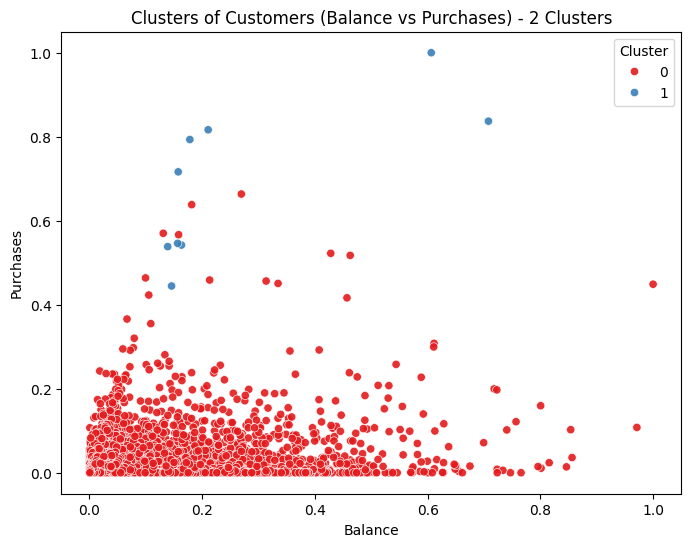

In [115]:
# Question_3a

# Build model with the best parameters
best_model = AgglomerativeClustering(
    n_clusters=best_n_clusters,
    linkage=best_result_agglo["linkage"],
    metric=best_result_agglo["metric"]
)

# Predict cluster labels
labels = best_model.fit_predict(scaled_df)

# Add cluster labels to DataFrame
scaled_df["Cluster"] = labels

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=scaled_df["BALANCE"], 
    y=scaled_df["PURCHASES"], 
    hue=scaled_df["Cluster"], 
    palette="Set1", alpha=0.9
)
plt.title(f"Clusters of Customers (Balance vs Purchases) - {best_n_clusters} Clusters")
plt.xlabel("Balance")
plt.ylabel("Purchases")
plt.legend(title="Cluster")
plt.show()


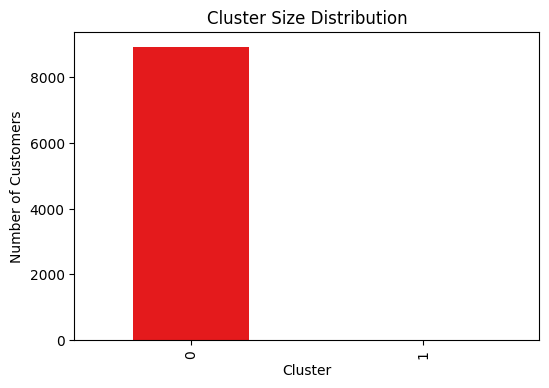

Cluster Sizes:
 Cluster
0    8941
1       9
Name: count, dtype: int64


In [116]:
# Histogram of cluster sizes
cluster_counts = scaled_df["Cluster"].value_counts().sort_index()

plt.figure(figsize=(6,4))
cluster_counts.plot(
    kind="bar", 
    color=sns.color_palette("Set1", len(cluster_counts))
)
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

print("Cluster Sizes:\n", cluster_counts)

### Histogram & Cluster Sizes

The histogram shows how many customers belong to each cluster.  

- **Cluster 0:** Contains the majority of customers.  
- **Cluster 1:** Contains a smaller group of customers.  

**Interpretation:**  
This imbalance is expected. Most customers are moderate or low spenders, while only a few belong to the high-value “power user” group.  

---
#### Actionable Marketing Insights

**Cluster 0 (Low/Moderate Users):**  
- Incentivize spending with cashback on everyday purchases.  
- Offer installment plans to encourage bigger purchases.  
- Send targeted campaigns to increase engagement frequency.  

**Cluster 1 (High Users):**  
- Provide premium loyalty programs.  
- Offer higher credit limits to support continued heavy usage.  
- Target with exclusive promotions on luxury items. 

### Final Reflection

The chosen model with 2 clusters does produce meaningful results, even though the clusters are not perfectly separated. Most customers fall into one large group of low to moderate users, while a small group stands out as high-value customers. This separation makes sense from a business point of view, since in reality only a few customers generate most of the revenue.

- ***Model Refinement and Observations***
  
During testing, I also tried other setups, like 3 clusters. That option gave a bit more detail by splitting the middle group, but the silhouette score was lower and the extra cluster didn’t add much clarity for marketing decisions. For that reason, I stayed with the 2-cluster model, which is simpler and easier for the marketing team to use.